<a href="https://colab.research.google.com/github/chiyanglin-AStar/science_coding/blob/main/%20fluid_mechanics_numerical_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Numerical methods of fluid mechanics

umerical methods in **fluid mechanics** are used to solve problems involving fluid motion, often governed by the **Navier-Stokes equations**, continuity equations, and conservation laws. These methods allow researchers to simulate flows in engineering, physics, and environmental science. Below is an overview of common numerical methods used in fluid mechanics, with sample cases for each.

ref :

- [Computational Fluid Dynamics](https://www.sciencedirect.com/topics/materials-science/computational-fluid-dynamics)

- [computational fluid dynamics open source -- google search](https://www.google.com/search?q=computational+fluid+dynamics+open+source&client=ms-android-sonymobile-rvo3&sca_esv=595201269&biw=358&bih=676&sxsrf=AM9HkKnW0XY0YLgIA5_L17WxWegpRB7-OQ%3A1704237476931&ei=pJmUZc24OISk2roPv-SF0AM&oq=Computational+fluid+Dynamics+op&gs_lp=EhNtb2JpbGUtZ3dzLXdpei1zZXJwIh9Db21wdXRhdGlvbmFsIGZsdWlkIER5bmFtaWNzIG9wKgIIADIIEAAYgAQYywEyBBAAGB4yBhAAGAgYHjIGEAAYCBgeMgYQABgIGB4yCBAAGAgYHhgPMggQABgIGB4YDzIGEAAYCBgeSPxDUIkcWKI1cAF4AZABAJgBmAGgAd0GqgEDOC4yuAEByAEA-AEBwgIKEAAYRxjWBBiwA8ICChAjGIAEGIoFGCfCAgYQABgeGA_CAgUQABiABMICCBAuGIAEGMsB4gMEGAAgQYgGAZAGCg&sclient=mobile-gws-wiz-serp)


### **1. Finite Difference Method (FDM)**

The **finite difference method** approximates derivatives in the governing equations using differences on a grid. This method is commonly applied to solve simple cases of fluid flow, such as the diffusion equation or incompressible Navier-Stokes equations.

#### **Case: 1D Heat Equation**
The heat equation is a simple example where temperature $T(x, t)$ evolves over time:

$\frac{\partial T}{\partial t} = \alpha \frac{\partial^2 T}{\partial x^2}.$


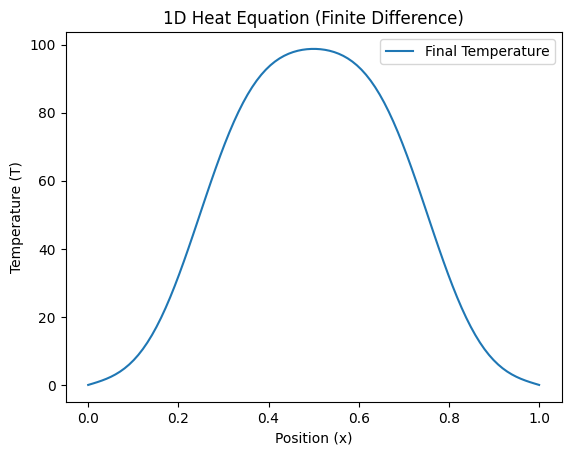

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0         # Length of the rod
Nx = 100        # Number of grid points
dx = L / Nx     # Grid spacing
alpha = 0.01    # Thermal diffusivity
dt = 0.0001     # Time step
steps = 5000    # Number of time steps

# Initialize temperature field
T = np.zeros(Nx)
T[int(Nx / 4):int(3 * Nx / 4)] = 100  # Initial hot region

# Time evolution (Finite Difference Method)
for _ in range(steps):
    T_new = T.copy()
    for i in range(1, Nx - 1):
        T_new[i] = T[i] + alpha * dt / dx**2 * (T[i+1] - 2*T[i] + T[i-1])
    T = T_new

# Plot result
plt.plot(np.linspace(0, L, Nx), T, label="Final Temperature")
plt.xlabel("Position (x)")
plt.ylabel("Temperature (T)")
plt.title("1D Heat Equation (Finite Difference)")
plt.legend()
plt.show()

### **2. Finite Volume Method (FVM)**

The **finite volume method** discretizes the governing equations by dividing the domain into small control volumes. It is particularly effective for solving conservation laws (e.g., mass, momentum, and energy).

#### **Case: 1D Advection Equation**
Solve the 1D advection equation:
$
\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0,
$
where $c$ is the advection velocity.

In [ ]:
# Parameters
L = 1.0         # Length of the domain
Nx = 100        # Number of grid points
dx = L / Nx     # Grid spacing
dt = 0.005      # Time step
c = 1.0         # Advection speed
steps = 200     # Number of time steps

# Initialize the field
x = np.linspace(0, L, Nx)
u = np.exp(-100 * (x - 0.5)**2)  # Initial Gaussian pulse

# Time evolution (Finite Volume Method)
for _ in range(steps):
    u_new = u.copy()
    for i in range(1, Nx - 1):
        flux_left = c * u[i - 1]
        flux_right = c * u[i]
        u_new[i] = u[i] - dt / dx * (flux_right - flux_left)
    u = u_new

# Plot result
plt.plot(x, u, label="Final Profile")
plt.xlabel("Position (x)")
plt.ylabel("u")
plt.title("1D Advection Equation (Finite Volume)")
plt.legend()
plt.show()

### **3. Finite Element Method (FEM)**

The **finite element method** divides the domain into smaller elements (triangles, quadrilaterals, etc.) and approximates the solution using basis functions. FEM is particularly suited for problems involving complex geometries.

#### **Case: Poisson Equation**
Solve the Poisson equation in 1D:

$\frac{d^2 u}{dx^2} = f(x),$
where $f(x)$ is a source term.

FEM implementation is often done using specialized libraries like **FEniCS** or **PyNucleus**.

**Python Code (FEniCS):**

In [5]:
# !pip install fenics
!pip3 install fenics-ffc --upgrade

In [7]:
!sudo add-apt-repository ppa:fenics-packages/fenics
!sudo apt update
!sudo apt install fenicsx

Repository: 'deb https://ppa.launchpadcontent.net/fenics-packages/fenics/ubuntu/ jammy main'
Description:
This PPA provides packages for the FEniCS project (https://fenicsproject.org).
More info: https://launchpad.net/~fenics-packages/+archive/ubuntu/fenics
Adding repository.
Press [ENTER] to continue or Ctrl-c to cancel.Aborted.
^C
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,192 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:9 http://archiv

In [8]:
!sudo apt-get update
!sudo apt-get install --no-install-recommends fenics

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [6]:
from fenics import *

# Create mesh and define function space
nx = 32
mesh = UnitIntervalMesh(nx)
V = FunctionSpace(mesh, "P", 1)

# Define boundary condition
u_D = Expression("1 + x[0]*x[0]", degree=2)
bc = DirichletBC(V, u_D, "on_boundary")

# Define problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = dot(grad(u), grad(v)) * dx
L = f * v * dx

# Solve
u = Function(V)
solve(a == L, u, bc)

# Plot solution
import matplotlib.pyplot as plt
plot(u)
plt.title("Solution of Poisson Equation (FEM)")
plt.show()

ModuleNotFoundError: No module named 'fenics'